In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge


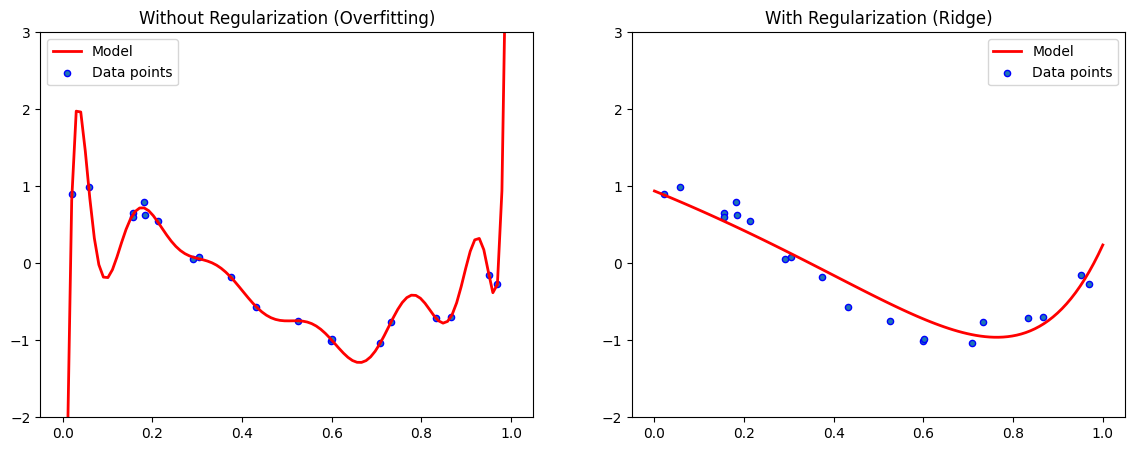

In [ ]:

# 1. サンプルデータの作成（少しノイズのある曲線）
np.random.seed(42)
X = np.sort(np.random.rand(20))
y = np.cos(1.5 * np.pi * X) + np.random.randn(20) * 0.1
X = X[:, np.newaxis]

# 2. モデルの準備
# 正則化なし（普通の線形回帰）
model_no_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=15)), # 15次の複雑な式
    ("linear", LinearRegression())
])

# 正則化あり（Ridge回帰：ペナルティを加える）
model_with_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=15)),
    ("ridge", Ridge(alpha=0.1)) # alphaがペナルティの強さ
])

# 3. 学習とプロット
X_test = np.linspace(0, 1, 100)[:, np.newaxis]

plt.figure(figsize=(14, 5))

for i, (model, title) in enumerate([(model_no_reg, "Without Regularization (Overfitting)"),
                                    (model_with_reg, "With Regularization (Ridge)")]):
    model.fit(X, y)
    y_pred = model.predict(X_test)

    plt.subplot(1, 2, i + 1)
    plt.plot(X_test, y_pred, label="Model", color='red', linewidth=2)
    plt.scatter(X, y, edgecolor='b', s=20, label="Data points")
    plt.title(title)
    plt.ylim(-2, 3)
    plt.legend()

plt.show()